# CDS2122 - Proyek
## Kelompok IBDA02:
### - Billy Hartono (232202959 / IBDA 2023)
### - Brian Christian Suroso (232202983 / IBDA 2023)
### - Joey Victor Natanael Djaja (232203245 / IBDA 2023)

## 1. Mempersiapkan, membersihkan, dan visualisasi data
### a. Mempersiapkan data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
display(df)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


### b. Menghapus data duplikat

In [17]:
# Hapus baris yang duplikat
df = df.drop_duplicates()

# Cek tipe data dan missing values
df.info()

# Statistik ringkasan
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### c. Visualisasi data

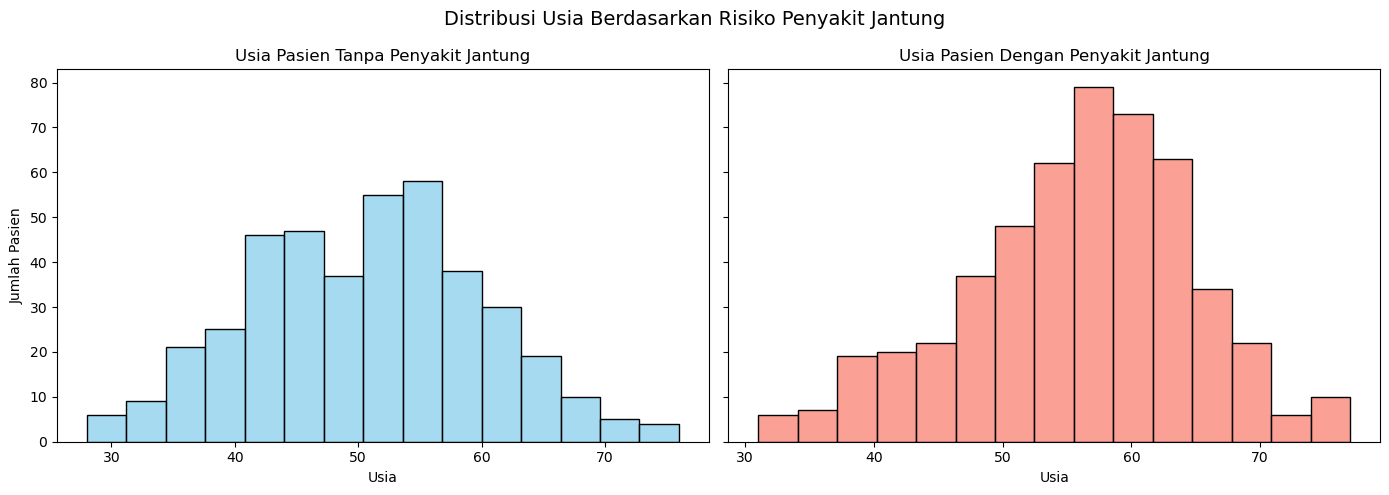

In [25]:
# Setup figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Histogram untuk target = 0
sns.histplot(df[df['target'] == 0]['age'], bins=15, color='skyblue', ax=axes[0])
axes[0].set_title('Usia Pasien Tanpa Penyakit Jantung')
axes[0].set_xlabel('Usia')
axes[0].set_ylabel('Jumlah Pasien')

# Histogram untuk target = 1
sns.histplot(df[df['target'] == 1]['age'], bins=15, color='salmon', ax=axes[1])
axes[1].set_title('Usia Pasien Dengan Penyakit Jantung')
axes[1].set_xlabel('Usia')
axes[1].set_ylabel('')

# Tampilkan plot
plt.suptitle('Distribusi Usia Berdasarkan Risiko Penyakit Jantung', fontsize=14)
plt.tight_layout()
plt.show()


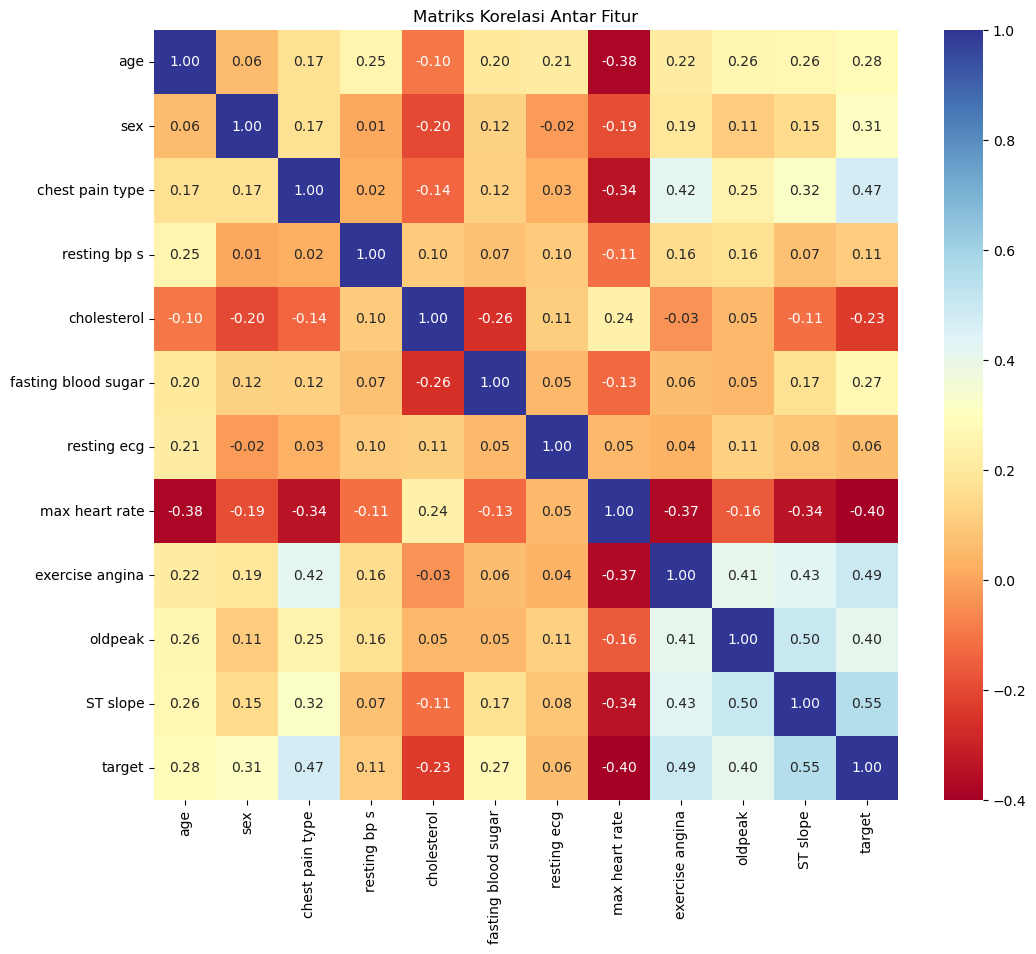

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

## 2. Pelatihan dan penyetelan model
### a. Membagi data untuk pelatihan dan data untuk diuji

In [36]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [40]:
# Siapkan fitur dan target
X = df.drop(columns='target')
y = df['target']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=skf)

# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=skf)

# Model 3: Support Vector Machine (belum dibahas di kelas)
svc = SVC()
svc_scores = cross_val_score(svc, X_train, y_train, cv=skf)

# Grid Search untuk Random Forest (contoh)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=skf)
grid_rf.fit(X_train, y_train)

# Akurasi model di data uji
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
grid_best_acc = accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test))

print({
    "Logistic Regression CV Accuracy": log_reg_scores.mean(),
    "Random Forest CV Accuracy": rf_scores.mean(),
    "SVM (Support Vector Machine) CV Accuracy": svc_scores.mean(),
    "Best Random Forest Test Accuracy (Grid Search)": grid_best_acc,
    "Test Accuracies": {
        "Logistic Regression": log_reg_acc,
        "Random Forest": rf_acc,
        "SVM": svc_acc
    },
    "Best RF Params": grid_rf.best_params_
})

{'Logistic Regression CV Accuracy': 0.8351784549436212, 'Random Forest CV Accuracy': 0.8610567514677104, 'SVM (Support Vector Machine) CV Accuracy': 0.855595937004939, 'Best Random Forest Test Accuracy (Grid Search)': 0.8858695652173914, 'Test Accuracies': {'Logistic Regression': 0.8858695652173914, 'Random Forest': 0.8858695652173914, 'SVM': 0.8858695652173914}, 'Best RF Params': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi data pelatihan dan pengujian
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Classification report
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Confusion Matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Train set
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], cmap='Blues', colorbar=False)
axs[0].set_title("Confusion Matrix - Train Set")

# Test set
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1], cmap='Greens', colorbar=False)
axs[1].set_title("Confusion Matrix - Test Set")

plt.tight_layout()
plt.show()

# ROC Curve - Test Set
y_test_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Tampilkan classification report
train_report, test_report, roc_auc